In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker

In [3]:
df = pd.read_csv(r"C:/Users/THARUNBALAAJE/Downloads/Walmart.csv")

In [4]:
print(df.head(4))

   Store        Date  Weekly_Sales  ...  Fuel_Price         CPI  Unemployment
0      1  05-02-2010    1643690.90  ...       2.572  211.096358         8.106
1      1  12-02-2010    1641957.44  ...       2.548  211.242170         8.106
2      1  19-02-2010    1611968.17  ...       2.514  211.289143         8.106
3      1  26-02-2010    1409727.59  ...       2.561  211.319643         8.106

[4 rows x 8 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set datecolumn as index
df.set_index('Date', inplace=True)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [8]:
#summary of weekly sales
weekly_sales = df["Weekly_Sales"].resample("W").sum()
 


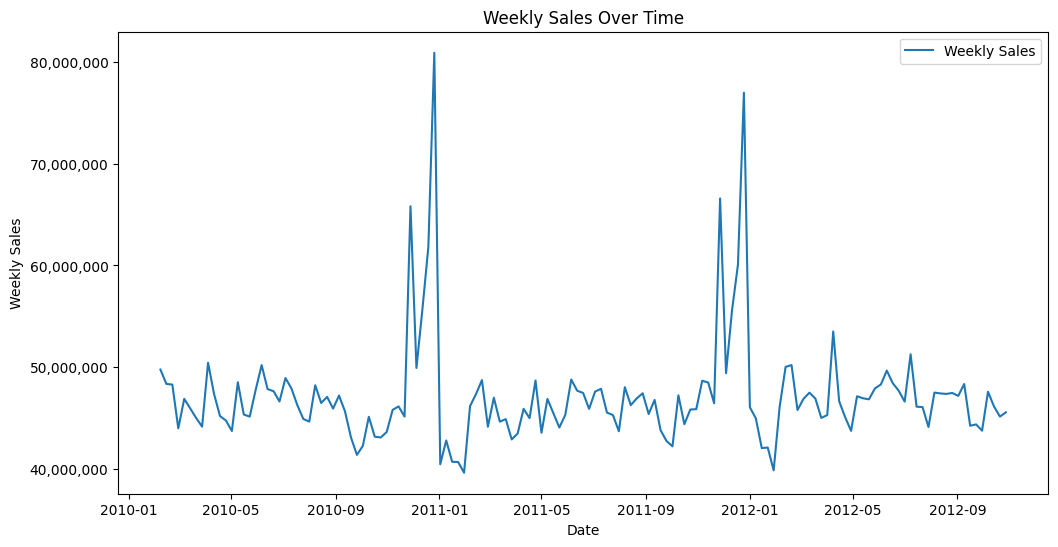

In [9]:
#plotting the Weekly Sales 
plt.figure(figsize =(12, 6))
plt.plot(weekly_sales, label='Weekly Sales')

#formatting y axis according to my needs like as with ticker 
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


https://www.kaggle.com/code/sebastianwillmann/time-series-forecasting-sarima

In [10]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

<Figure size 1500x600 with 0 Axes>

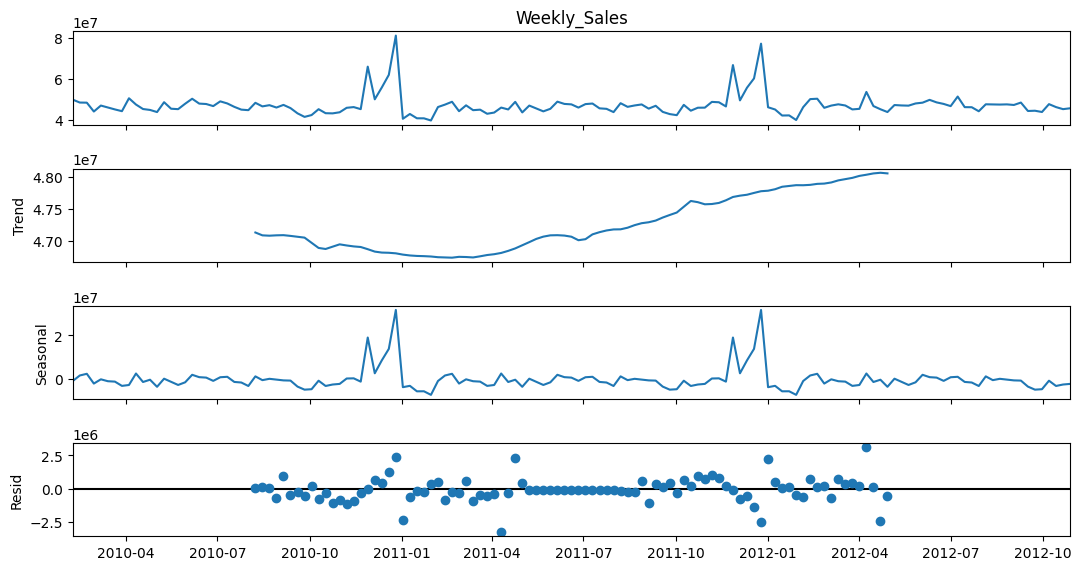

In [11]:

# Plot time series decomposition
plt.figure(figsize=(15,6))

decomposition = sm.tsa.seasonal_decompose(weekly_sales, model='additive', period=52)
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

In [12]:
adf_test = adfuller(weekly_sales.dropna())
print("Augmented Dickey-Fuller Test Results: ")
print(f'ADF statistics: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print(f'critical values: {adf_test[4]}')

if adf_test[1] <= 0.05:
    print("THe time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be required.")

Augmented Dickey-Fuller Test Results: 
ADF statistics: -5.908297957186334
p-value: 2.675979158986027e-07
critical values: {'1%': np.float64(-3.47864788917503), '5%': np.float64(-2.882721765644168), '10%': np.float64(-2.578065326612056)}
THe time series is stationary.


In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
model = ARIMA(weekly_sales, order =(5,1,0))
model_fit = model.fit()


In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2402.605
Date:                Sun, 03 Aug 2025   AIC                           4817.211
Time:                        20:54:14   BIC                           4834.946
Sample:                    02-07-2010   HQIC                          4824.417
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3061      0.042     -7.365      0.000      -0.388      -0.225
ar.L2         -0.2088      0.047     -4.413      0.000      -0.302      -0.116
ar.L3         -0.1829      0.058     -3.157      0.002      -0.296      -0.069
ar.L4          0.0932      0.060      1.562      0.118      -0.024       0.210
ar.L5         -0.1483      0.059     -2.530      0.011      -0.263      -0.033
sigma2       2.69e+13   3.82e-16   7.04e+28      0.000    2.69e+13    2.69e+13
===================================================================================
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):               382.90
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.27
Prob(H) (two-sided):                  0.02   Kurtosis:                        11.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.6e+44. Standard errors may be unstable.
"""

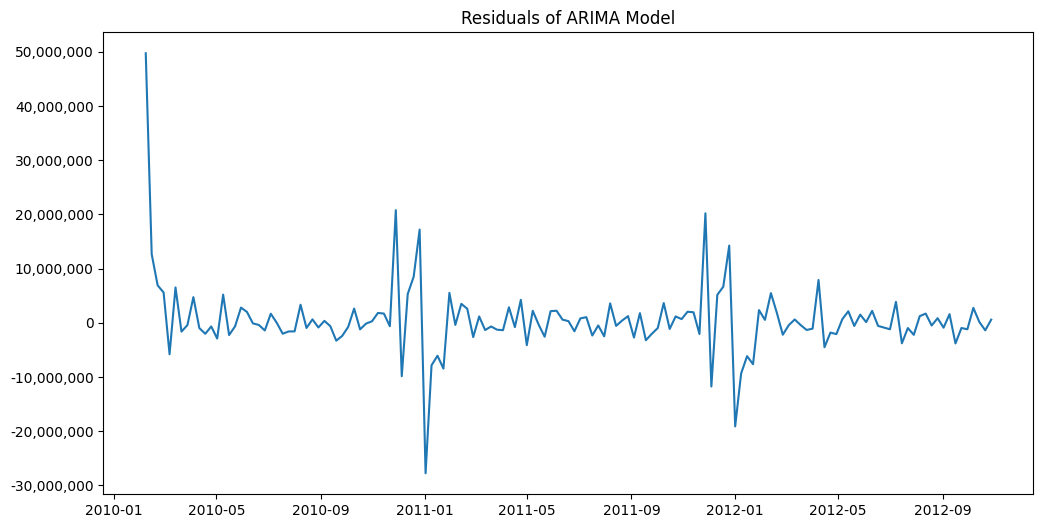

In [ ]:
#plotting the residuals
residuals = model_fit.resid 
plt.figure(figsize=(12, 6))

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()
